# HOUSING PRICE PREDICTION Use Case
Every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Basically Price Prediction is technique to increase the companies that are in the domain of housing and real estate and are working to achieve the Business goals such as increasing overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases.Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company. A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below. The company is looking at prospective properties to buy houses to enter the market.I build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know: • Which variables are important to predict the price of variable? Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition

• How do these variables describe the price of the house? This is our Problem statement.

# Step 1: Acquire the data 

In [29]:
#First, import Pandas, a library for working with data in Python. Next we’ll import Numpy.

In [30]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [31]:
train = pd.read_csv('traindatafor_housingpro.csv', delimiter="\t", encoding='utf-8')
train.shape
#train_df


(1168, 81)

In [32]:
test = pd.read_csv('TestData_Housing.csv', delimiter="\t", encoding='utf-8')
test.shape

(292, 80)

We see that test has only 80 columns, while train has 81. This is due to, of course, the fact that the test data do not include the final sale price information!

In [131]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,enc_street,enc_condition
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2007,WD,Normal,128000,1,0
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,10,2007,WD,Normal,268000,1,0
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,6,2007,WD,Normal,269790,1,0
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,MnPrv,NaN,0,1,2010,COD,Normal,190000,1,0
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,6,2009,WD,Normal,215000,1,0


# About the Columns

In [45]:
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

# Step 2: Explore the data and engineer Features
The challenge is to predict the final sale price of the homes. This information is stored in the SalePrice column. The value we are trying to predict is often called the target variable.

We can use Series.describe() to get more information.

In [46]:
train.SalePrice.describe()

count      1168.000000
mean     181477.005993
std       79105.586863
min       34900.000000
25%      130375.000000
50%      163995.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Series.describe() gives you more information about any series. count displays the total number of rows in the series. For numerical data, Series.describe() also gives the mean, std, min and max values as well.

Next, we’ll check for skewness, which is a measure of the shape of the distribution of values.



We use plt.hist() to plot a histogram of SalePrice. Notice that the distribution has a longer tail on the right. The distribution is positively skewed.

Skew is: 1.953877705368286


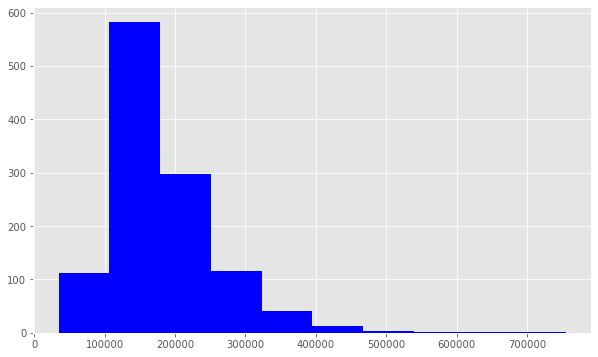

In [47]:
print ("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show()

Now we use np.log() to transform train.SalePric and calculate the skewness a second time, as well as re-plot the data. A value closer to 0 means that we have improved the skewness of the data. We can see visually that the data will more resembles a normal distribution.

Skew is: 0.07359740998337982


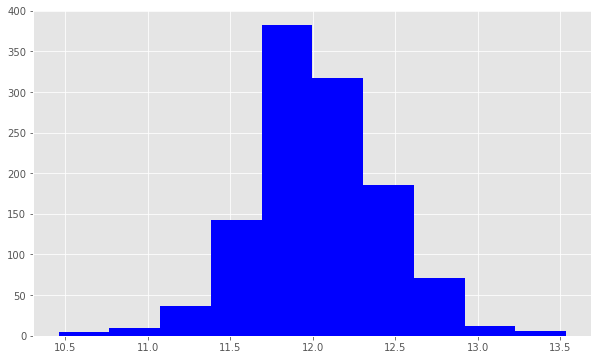

In [48]:
target = np.log(train.SalePrice)
print ("Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

Skew is: 0.07359740998337982

Now that we’ve transformed the target variable, let’s consider our features. First, we’ll check out the numerical features and make some plots. The .select_dtypes() method will return a subset of columns matching the specified data types.

# Working with Numeric Features

In [49]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

The DataFrame.corr() method displays the correlation (or relationship) between the columns. We’ll examine the correlations between the features and the target.

In [50]:
corr = numeric_features.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.789185
GrLivArea      0.707300
GarageCars     0.628329
GarageArea     0.619000
Name: SalePrice, dtype: float64 

YrSold          -0.045508
MSSubClass      -0.060775
OverallCond     -0.065642
EnclosedPorch   -0.115004
KitchenAbvGr    -0.132108
Name: SalePrice, dtype: float64


The first five features are the most positively correlated with SalePrice, while the next five are the most negatively correlated.

Let’s dig deeper on OverallQual. We can use the .unique() method to get the unique values.

In [51]:
train.OverallQual.unique()

array([ 6,  8,  7,  5,  9,  1,  2,  4,  3, 10], dtype=int64)

The OverallQual data are integer values in the interval 1 to 10 inclusive.

We can create a pivot table to further investigate the relationship between OverallQual and SalePrice. The Pandas docs demonstrate how to accomplish this task. We set index='OverallQual' and values='SalePrice'. We chose to look at the median here.

In [52]:
quality_pivot = train.pivot_table(index='OverallQual',
                  values='SalePrice', aggfunc=np.median)

In [53]:
quality_pivot

,SalePrice
OverallQual,
1,50150.0
2,60000.0
3,86250.0
4,108959.0
5,133700.0
6,160000.0
7,200120.5
8,268750.0
9,343821.5


To help us visualize this pivot table more easily, we can create a bar plot using the Series.plot() method.

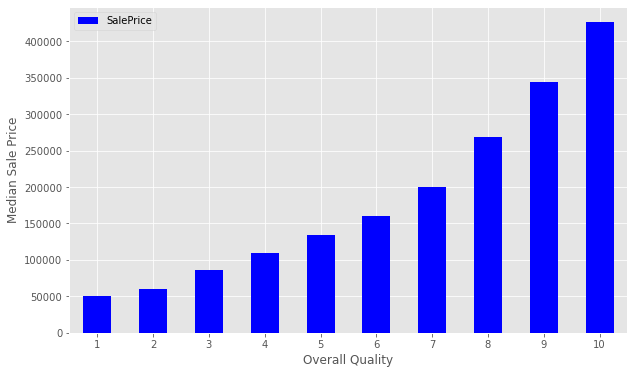

In [55]:
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

Notice that the median sales price strictly increases as Overall Quality increases.

Next, let’s use plt.scatter() to generate some scatter plots and visualize the relationship between the Ground Living Area GrLivArea and SalePrice.

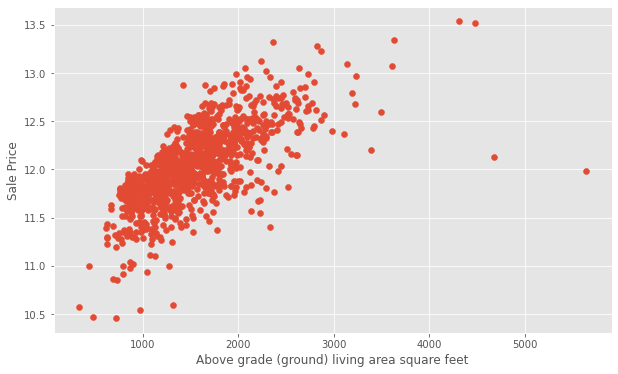

In [56]:
plt.scatter(x=train['GrLivArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

 we see that increases in living area correspond to increases in price. We will do the same for GarageArea.

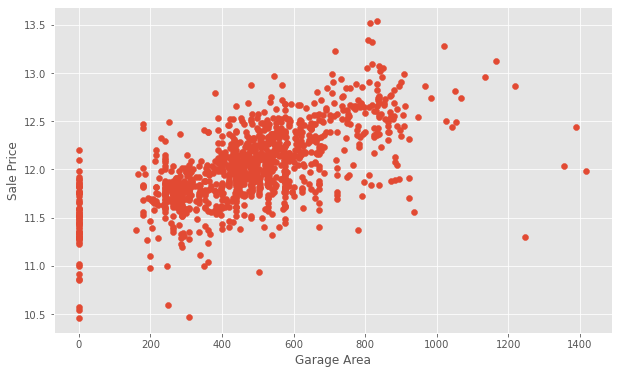

In [57]:
plt.scatter(x=train['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

we notice that there are many homes with 0 for Garage Area, indicating that they don’t have a garage. We’ll transform other features later to reflect this assumption. There are a few outliers as well. Outliers can affect a regression model by pulling our estimated regression line further away from the true population regression line. So, we’ll remove those observations from our data. Removing outliers is an art and a science. There are many techniques for dealing with outliers.

We will create a new dataframe with some outliers removed.

In [58]:
train = train[train['GarageArea'] < 1200]

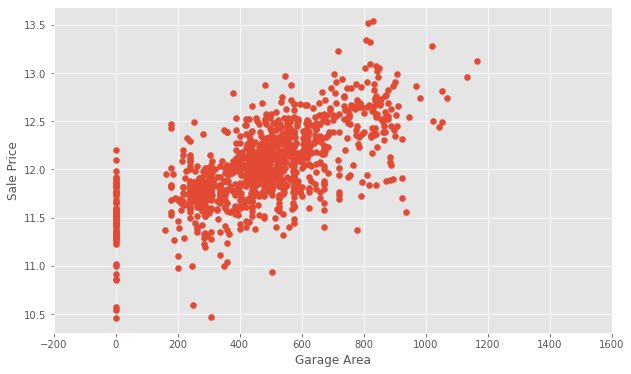

In [59]:
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.xlim(-200,1600) # This forces the same scale as before
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()


# Handling Null Values
Next, we’ll examine the null or missing values.

We will create a DataFrame to view the top null columns. Chaining together the train.isnull().sum() methods, we return a Series of the counts of the null values in each column.

In [60]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1157
MiscFeature,1120
Alley,1086
Fence,926
FireplaceQu,550
LotFrontage,213
GarageYrBlt,64
GarageFinish,64
GarageType,64


The documentation can help us understand the missing values. In the case of PoolQC, the column refers to Pool Quality. Pool quality is NaN when PoolArea is 0, or there is no pool.
We can find a similar relationship between many of the Garage-related columns.

Let’s take a look at one of the other columns, MiscFeature. We’ll use the Series.unique() method to return a list of the unique values.

In [61]:
print ("Unique values are:", train.MiscFeature.unique())

Unique values are: [nan 'Shed' 'Gar2' 'TenC' 'Othr']


We can use the documentation to find out what these values indicate:

These values describe whether or not the house has a shed over 100 sqft, a second garage, and so on. We might want to use this information later. It’s important to gather domain knowledge in order to make the best decisions when dealing with missing data.

# Wrangling the non-numeric Features
Let’s now consider the non-numeric features.

In [63]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1163,1163,77,1163,1163,1163,1163,1163,1163,1163,...,1099,1099,1099,1099,1163,6,237,43,1163,1163
unique,5,2,2,4,4,1,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,924,1160,41,736,1044,1163,838,1101,182,1002,...,688,487,1045,1056,1066,2,129,39,998,943


# Transforming and engineering features

In [65]:
print ("Original: \n")
print (train.Street.value_counts(), "\n")

Original: 

Pave    1160
Grvl       3
Name: Street, dtype: int64 



In the Street column, the unique values are Pave and Grvl, which describe the type of road access to the property. In the training set, only 5 homes have gravel access. Our model needs numerical data, so we will use one-hot encoding to transform the data into a Boolean column.

We create a new column called enc_street. The pd.get_dummies() method will handle this for us.

As mentioned earlier, we need to do this on both the train and test data.

In [66]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)

In [67]:
print ('Encoded: \n')
print (train.enc_street.value_counts())

Encoded: 

1    1160
0       3
Name: enc_street, dtype: int64


The values agree. We’ve engineered our first feature! Feature Engineering is the process of making features of the data suitable for use in machine learning and modelling. When we encoded the Street feature into a column of Boolean values, we engineered a feature.

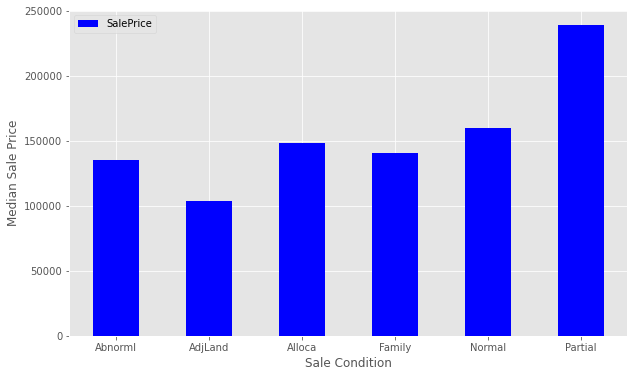

In [68]:
condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

Notice that Partial has a significantly higher Median Sale Price than the others. We will encode this as a new feature. We select all of the houses where SaleCondition is equal to Patrial and assign the value 1, otherwise assign 0.

Follow a similar method that we used for Street above.

In [132]:
def encode(x):
 return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

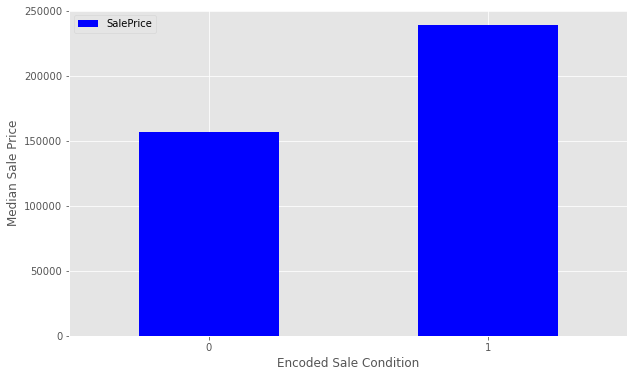

In [70]:
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

This looks great. You can continue to work with more features to improve the ultimate performance of your model.

Before we prepare the data for modeling, we need to deal with the missing data. We’ll fill the missing values with an average value and then assign the results to data. This is a method of interpolation. The DataFrame.interpolate() method makes this simple.

This is a quick and simple method of dealing with missing values, and might not lead to the best performance of the model on new data. Handling missing values is an important part of the modeling process, where creativity and insight can make a big difference. This is another area where you can extend on this tutorial.

In [80]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [90]:
sum(data.isnull().sum() != 0)

0

In [92]:
data.shape

(1162, 40)

# Step 3 : Build a linear model

 Perform the final steps to prepare our data for modeling. We’ll separate the features and the target variable for modeling. We will assign the features to X and the target variable to y. We use np.log() as explained above to transform the y variable for the model. data.drop([features], axis=1) tells pandas which columns we want to exclude. We won’t include SalePrice for obvious reasons, and Id is just an index with no relationship to SalePrice.

In [93]:
y = np.log(data.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)


In [94]:
y.shape

(1162,)

In [95]:
X.shape

(1162, 38)

Let’s partition the data and start modeling.
We will use the train_test_split() function from scikit-learn to create a training set and a hold-out set. Partitioning the data in this way allows us to evaluate how our model might perform on data that it has never seen before. If we train the model on all of the test data, it will be difficult to tell if overfitting has taken place.

train_test_split() returns four objects:

X_train is the subset of our features used for training.
X_test is the subset which will be our ‘hold-out’ set – what we’ll use to test the model.
y_train is the target variable SalePrice which corresponds to X_train.
y_test is the target variable SalePrice which corresponds to X_test.
The first parameter value X denotes the set of predictor data, and y is the target variable. Next, we set random_state=42. This provides for reproducible results, since sci-kit learn’s train_test_split will randomly partition the data. The test_size parameter tells the function what proportion of the data should be in the test partition. In this example, about 33% of the data is devoted to the hold-out set.

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                          X, y, random_state=42, test_size=.33)

# Begin modelling
We will first create a Linear Regression model. First, we instantiate the model.

In [97]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [98]:
model = lr.fit(X_train, y_train)

Evaluate the performance and visualize results
Now, we want to evaluate the performance of the model.
Each competition might evaluate the sublessons differently. In this competition, Kaggle will evaluate our sublesson using root-mean-squared-error (RMSE). We’ll also look at The r-squared value. The r-squared value is a measure of how close the data are to the fitted regression line. It takes a value between 0 and 1, 1 meaning that all of the variance in the target is explained by the data. In general, a higher r-squared value means a better fit.

The model.score() method returns the r-squared value by default.

In [99]:
print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.8689551545402041


This means that our features explain approximately 89% of the variance in our target variable. Follow the link above to learn more.

In [100]:
predictions = model.predict(X_test)

 The model.predict() method will return a list of predictions given a set of predictors. Use model.predict() after fitting the model.

In [102]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.023194779631159845


Interpreting this value is somewhat more intuitive that the r-squared value. The RMSE measures the distance between our predicted values and actual values.

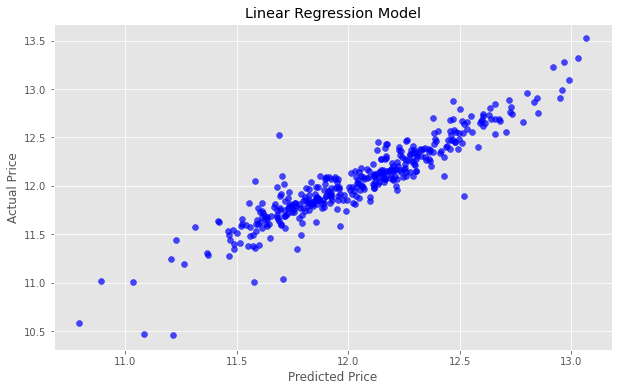

In [103]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

If our predicted values were identical to the actual values, this graph would be the straight line y=x because each predicted value x would be equal to each actual value y.

# Try to improve the model
We’ll next try using Ridge Regularization to decrease the influence of less important features. Ridge Regularization is a process which shrinks the regression coefficients of less important features.

We’ll once again instantiate the model. The Ridge Regularization model takes a parameter, alpha , which controls the strength of the regularization.

We’ll experiment by looping through a few different values of alpha, and see how this changes our results.

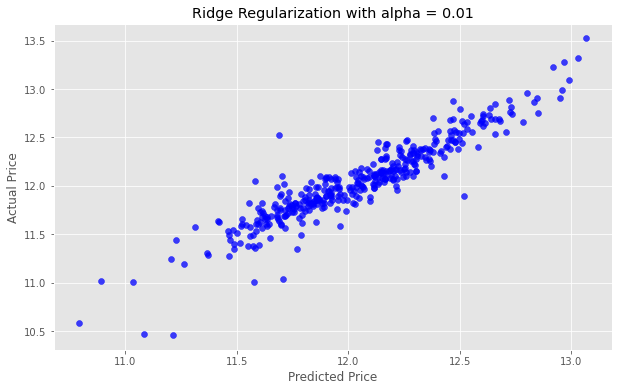

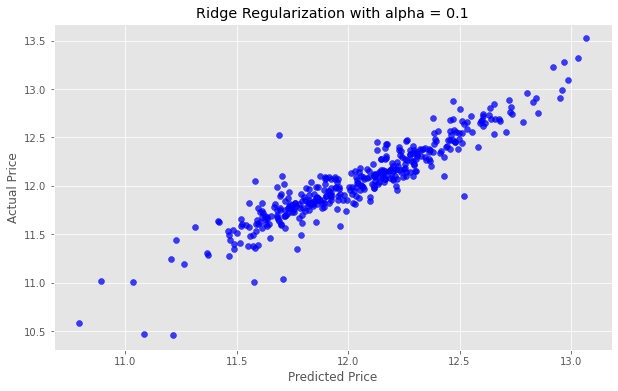

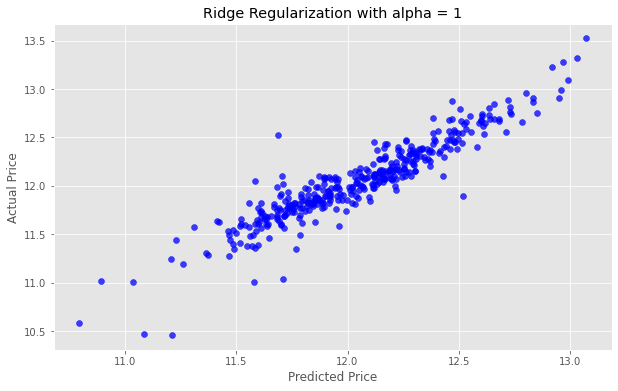

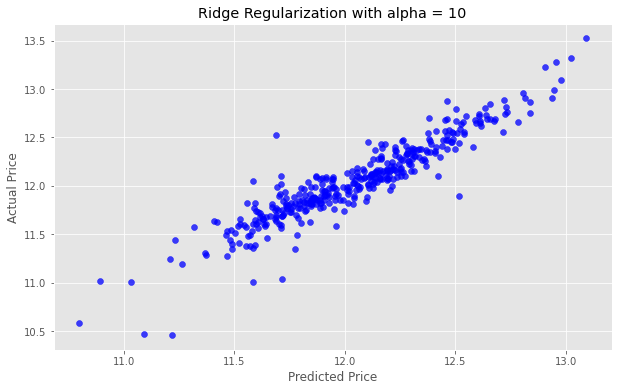

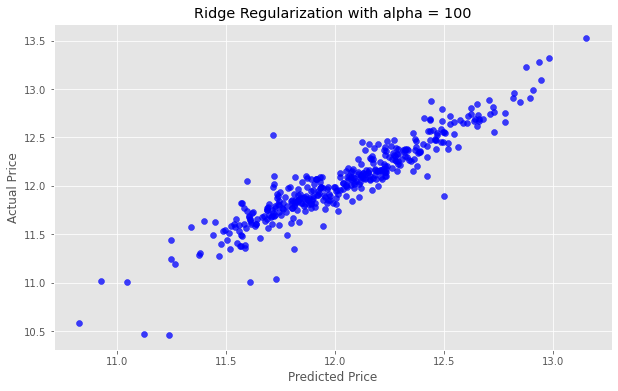

In [120]:
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)

    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate('Local Max', xy =(3.3, 1),
                xytext =(3, 1.8), 
                arrowprops = dict(facecolor ='green',
                                  shrink = 0.05),)
    plt.show()

These models perform almost identically to the first model. In our case, adjusting the alpha did not substantially improve our model. As you add more features, regularization can be helpful. Repeat this step after you’ve added more features.

# Step 4: Make a sublesson

We’ll need to create a csv that contains the predicted SalePrice for each observation in the test.csv dataset.

We’ll log in to our Kaggle account and go to the sublesson page to make a sublesson.
We will use the DataFrame.to_csv() to create a csv to submit.
The first column must the contain the ID from the test data.

In [121]:
sublesson = pd.DataFrame()
sublesson['Id'] = test.Id

Now, select the features from the test data for the model as we did above.

In [122]:
feats = test.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()

Next, we generate our predictions.

In [123]:
predictions = model.predict(feats)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- PoolQC
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Now we’ll transform the predictions to the correct form. Remember that to reverse log() we do exp().
So we will apply np.exp() to our predictions becasuse we have taken the logarithm previously.

In [124]:
final_predictions = np.exp(predictions)

In [125]:
print ("Original predictions are: \n", predictions[:5], "\n")
print ("Final predictions are: \n", final_predictions[:5])

Original predictions are: 
 [12.84520573 12.27704613 11.94877367 11.76975294 11.71388206] 

Final predictions are: 
 [378967.49929186 214710.55096421 154627.40603654 129282.20681891
 122257.17009583]


Lets assign these predictions and check that everything looks good.

In [127]:
sublesson['SalePrice'] = final_predictions[292]
sublesson.head(20)

,Id,SalePrice
0,337,182572.898627
1,1018,182572.898627
2,929,182572.898627
3,1148,182572.898627
4,1227,182572.898627
5,650,182572.898627
6,1453,182572.898627
7,152,182572.898627
8,427,182572.898627
9,776,182572.898627


One we’re confident that we’ve got the data arranged in the proper format, we can export to a .csv file. We pass index=False because Pandas otherwise would create a new index for us.

In [128]:
sublesson.to_csv('sublesson1.csv', index=False)

# Submit our results
We’ve created a file called sublesson1.csv in our working directory that conforms to the correct format. Go to the sublesson page to make a sublesson.

We placed 1602 out of about 2400 competitors. Almost middle of the pack, not bad! Notice that our score here is .15097, which is better than the score we observed on the test data. That’s a good result, but will not always be the case.